In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from matplotlib.font_manager import FontProperties
from sklearn import manifold
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
engine = create_engine('sqlite:///tw50.db')

# 技術分析做K-means

In [2]:
link = []
for i in range(3):
    html = urlopen("https://www.cnyes.com/twstock/index2real.aspx?PageIndex="+str(i+1)+
                   "&itype=TW50&stitle=%u81fa%u7063%u4e94%u5341%u6307%u6578%u6210%u4efd%u80a1")
    soup = BeautifulSoup(html,"lxml")
    soup = soup.find('div',{'class':'mbx screenBx'})
    soup = soup.findAll('tr')
    for row in soup[2:]:
        link.append('https://www.cnyes.com'+ row.find('a').get('href'))

In [3]:
data = np.zeros([50,29], dtype=float)
name = []
for i,row in enumerate(link):
    html = urlopen('https://www.cnyes.com/twstock/Technical/' + row[-8:])
    soup = BeautifulSoup(html,"lxml")
    temp_name = soup.find('span',{'id':'ctl00_ContentPlaceHolder1_titleLab'})
    name.append(temp_name.text.split(' ')[0])
    soup = soup.find('div',{'class':'tab'})
    soup = soup.findAll('table')
    temp_data = []
    for j in soup:
        temp = j.findAll('tr')[1]
        temp = temp.findAll('td',{'class':'rt'})
        for k in temp:
            temp_data.append(float(k.getText()))
    data[i] = temp_data

In [4]:
data = pd.DataFrame(data,index=name , columns=['收盤價','3日均價','5日均價','10日均價','20日均價','60日均價','120日均價','240日均價',
                           '成交張數','3日均量','5日均量','10日均量','20日均量','60日均量','120日均量','240日均量',
                           '6日rsi','9日 k值','9日 d值','12日 obv','26日 ar值','26日 br值','26日 vr值','72日bias',
                           '3-6乖離率','10日 mtm','9日威廉','tapi','12日心理線'])

In [5]:
data

,收盤價,3日均價,5日均價,10日均價,20日均價,60日均價,120日均價,240日均價,成交張數,3日均量,...,12日 obv,26日 ar值,26日 br值,26日 vr值,72日bias,3-6乖離率,10日 mtm,9日威廉,tapi,12日心理線
台泥,35.75,35.40,35.15,35.12,35.05,36.63,39.16,39.31,17762.0,14249.0,...,7802.78,1.03,0.83,0.87,-0.04,-0.44,-0.10,6.67,496825.40,0.58
亞泥,34.00,33.55,33.32,33.54,33.26,35.30,37.41,33.94,9572.0,7023.0,...,5895.17,0.70,0.80,0.65,-0.05,-0.31,-0.50,34.29,281529.80,0.50
統一,68.90,69.53,69.14,69.53,71.64,74.12,75.65,72.83,7753.0,7920.0,...,3094.93,0.60,0.73,0.69,-0.07,2.15,-4.40,61.40,112523.40,0.42
臺塑,99.20,99.10,99.06,100.03,100.18,103.94,107.39,105.81,6779.0,6555.0,...,2797.30,1.05,0.94,0.92,-0.06,-2.00,-2.80,75.00,68340.97,0.50
南亞,73.00,72.80,72.70,73.15,74.64,77.54,81.04,81.52,4792.0,5817.0,...,2225.84,0.83,0.65,0.46,-0.07,-0.08,-1.40,65.52,65643.48,0.25
台化,105.00,105.33,105.10,105.70,106.03,112.33,115.54,112.71,4051.0,3385.0,...,1656.94,0.88,0.71,0.52,-0.08,1.00,-2.50,87.50,38579.14,0.25
遠東新,28.15,28.40,28.50,28.57,28.66,31.32,32.21,29.64,13323.0,10592.0,...,4190.39,0.67,0.43,0.44,-0.12,-0.36,-1.15,92.00,473270.00,0.25
中鋼,24.15,24.27,24.11,24.14,24.07,24.39,24.46,24.22,10742.0,15692.0,...,8365.88,0.63,0.74,1.04,-0.01,-2.54,-0.10,46.67,444789.20,0.42
正新,42.90,42.48,42.00,42.27,41.49,43.02,44.73,46.65,3384.0,2996.0,...,2851.49,0.66,0.46,1.40,-0.02,-0.56,-0.30,21.15,78877.97,0.58
光寶科,40.45,40.57,40.63,40.87,39.91,37.72,37.50,38.83,4284.0,6181.0,...,6996.29,1.97,0.55,2.52,0.08,-0.30,-0.85,61.36,105903.50,0.50


In [6]:
kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=4, max_iter=1000, n_init=3).fit(data)

In [7]:
temp = {}
for i in range(50):
    temp[name[i]] = kmeans.labels_[i]

In [8]:
data['label'] = data.index.map(temp)

# 結果

In [9]:
data.sort_values('label')['label']

華新科      0
中華電      0
聯發科      0
可成       0
台塑化      0
台灣高鐵     0
彰銀       0
中壽       0
富邦金      0
統一超      0
大立光      0
台灣大      0
日月光投控    0
遠傳       0
和碩       0
中租-KY    0
南亞科      0
研華       0
寶成       0
華碩       0
南亞       0
廣達       0
臺塑       0
統一       0
光寶科      0
正新       0
國巨       0
台積電      0
鴻準       0
台達電      0
台化       0
群創       1
開發金      1
元大金      1
台新金      1
永豐金      1
中信金      1
友達       1
聯電       2
合庫金      3
亞泥       3
兆豐金      3
中鋼       3
第一金      3
玉山金      3
國泰金      3
華南金      3
鴻海       3
遠東新      3
台泥       3
Name: label, dtype: int64

# 均價加報酬率做K-means

In [10]:
data = pd.read_csv('50.csv',index_col='證券代碼')

In [11]:
data = data.drop('日期',axis=1)

In [12]:
data

,3日均價(元),5日均價(元),10日均價(元),13日均價(元),15日均價(元),20日均價(元),25日均價(元),26日均價(元),30日均價(元),55日均價(元),60日均價(元),65日均價(元),72日均價(元),125日均價(元),250日均價(元),週報酬率 %,月報酬率 %,季報酬率 %,年報酬率 %
證券代碼,,,,,,,,,,,,,,,,,,,
1101 台泥,36.28,36.28,35.42,35.11,34.96,34.69,34.52,34.52,34.51,34.16,34.13,34.10,34.09,34.37,35.13,3.6985,8.6439,7.8403,8.0504
1102 亞泥,27.75,27.56,27.23,27.14,27.05,26.96,26.94,26.94,26.93,26.93,26.93,26.92,26.95,26.95,27.72,3.6765,1.2566,5.0279,10.6024
1216 統一,65.80,65.42,65.25,65.45,65.34,65.08,64.79,64.76,64.74,64.25,64.27,64.16,64.12,62.87,59.72,1.0720,3.6107,4.9284,28.1089
1301 台塑,98.03,97.22,96.07,95.49,95.17,94.68,94.29,94.22,94.01,93.23,93.22,93.10,93.12,93.05,91.91,3.4591,8.9405,7.5165,16.3245
1303 南亞,77.53,77.12,76.40,76.02,75.78,75.61,75.62,75.61,75.56,75.19,75.11,75.05,75.14,75.31,73.95,2.2309,3.0423,3.8664,16.0451
1326 台化,101.50,100.08,99.07,98.12,97.57,96.92,96.24,96.15,95.87,94.56,94.45,94.24,94.13,93.53,93.81,5.6411,13.1869,11.8349,13.5544
1402 遠東新,26.35,26.18,25.93,25.85,25.79,25.71,25.69,25.70,25.71,25.63,25.53,25.42,25.34,25.01,25.26,2.8790,4.8924,11.2034,14.3447
2002 中鋼,24.67,24.55,24.41,24.37,24.37,24.41,24.41,24.41,24.42,24.53,24.54,24.53,24.52,24.82,24.91,1.2270,1.0203,1.2271,3.8752
2105 正新,51.83,51.38,51.24,51.18,51.17,51.37,51.45,51.52,51.82,54.94,55.46,55.86,56.37,58.59,60.68,2.7398,2.1402,-13.0795,-9.4255


In [13]:
kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=4, max_iter=1000, n_init=3).fit(data)

In [14]:
temp = {}
for j,i in enumerate(data.index):
    temp[i] = kmeans.labels_[j]

In [15]:
data = data.drop(index='3008 大立光')

In [16]:
data['label'] = data.index.map(temp)

# 結果

In [17]:
data.sort_values('label')['label']

證券代碼
2354 鴻準       0
2412 中華電      0
2317 鴻海       0
2308 台達電      0
3045 台灣大      0
6505 台塑化      0
2408 南亞科      0
4904 遠傳       0
5871 中租-KY    0
1326 台化       0
1303 南亞       0
1301 台塑       0
1216 統一       0
2492 華新科      0
4938 和碩       0
2382 廣達       0
2454 聯發科      2
2912 統一超      2
2474 可成       2
2357 華碩       2
2330 台積電      2
2327 國巨       2
2395 研華       2
2885 元大金      3
3481 群創       3
5880 合庫金      3
2892 第一金      3
2891 中信金      3
2890 永豐金      3
2887 台新金      3
2886 兆豐金      3
2884 玉山金      3
1101 台泥       3
2882 國泰金      3
2881 富邦金      3
2880 華南金      3
2823 中壽       3
2801 彰銀       3
2633 台灣高鐵     3
2409 友達       3
2303 聯電       3
2301 光寶科      3
2105 正新       3
2002 中鋼       3
1402 遠東新      3
1102 亞泥       3
2883 開發金      3
9904 寶成       3
Name: label, dtype: int64

# 一年每週價格漲跌幅做K-means

In [10]:
conn = sqlite3.connect('tw50.db')
c = conn.cursor()

In [11]:
names = []
cursor = c.execute("SELECT DISTINCT id FROM price")
for row in cursor:
    names.append(row[0])

names.remove('5871 中租-KY')
names.remove('5880 合庫金')

In [12]:
rate = []
for name in names:
    cursor = c.execute("SELECT price FROM price WHERE id = ?  AND date >= ? ORDER BY date ASC LIMIT 53",[name,'2010-12-03'])

    price = []
    for row in cursor:
        price.append(row[0])
    
    temp = []
    for i in range(len(price)):
        if i == 0:
            continue
        temp.append((price[i]-price[i-1])/price[i-1])
    rate.append(temp)

In [13]:
distance = []
for i in rate:
    temp = []
    for j in rate:
        corr= np.corrcoef(i,j)
        corr = corr[0][-1]
        if i == j:
            corr = 1
        temp.append(1-(corr*0.5+0.5))
    distance.append(temp)

In [14]:
mds = manifold.MDS(n_jobs=3,random_state=1,dissimilarity="precomputed")
pos = mds.fit(distance).embedding_

clf = KMeans(n_clusters=4)
clf.fit(rate)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# 結果

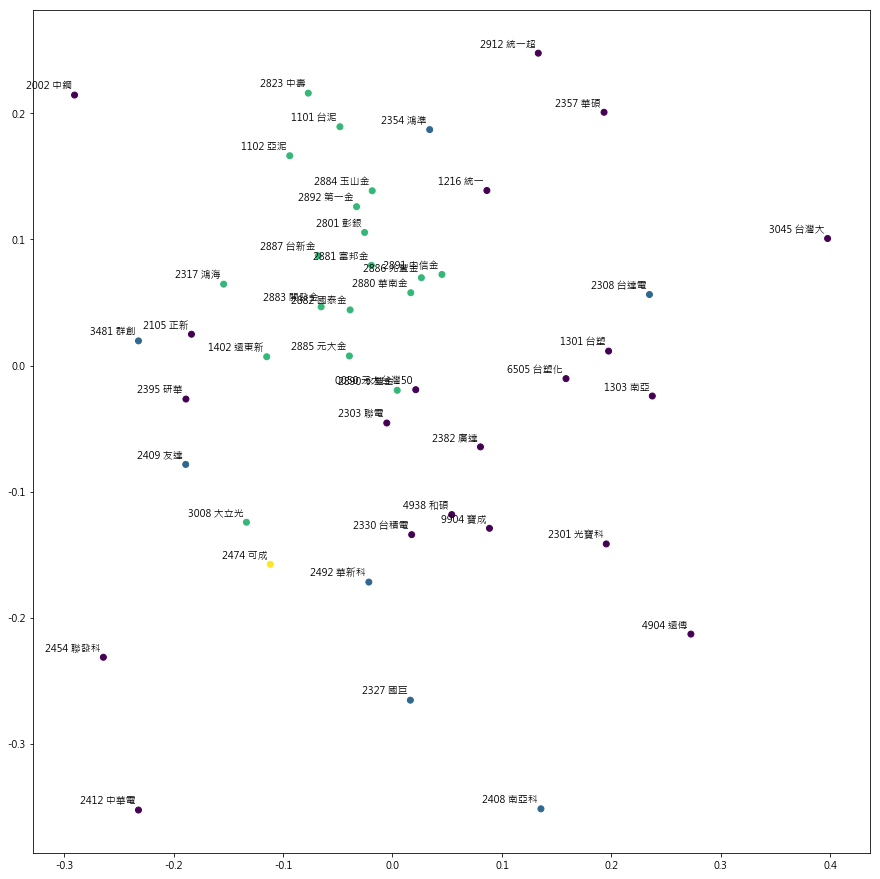

In [15]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(bottom=0.1)  
plt.scatter(pos[:, 0], pos[:, 1], c=clf.labels_)
# for i,name in enumerate(names):
#     names[i] = name.split(' ')[1]
for label, x, y in zip(names, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [16]:
year = '2006'
remuneration0 = []
remuneration1 = []

for i in range(6):
    temp = year+'-01-01'
    data0 = pd.read_sql('select * from price where (id = "2408 南亞科" or id = "2886 兆豐金" or id = "2330 台積電" or id = "2474 可成") and date > ? ORDER BY date ASC LIMIT 3',con=engine,index_col='id',params=[temp])
    data00 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date > ? ORDER BY date ASC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data00)
    temp = year+'-12-31'
    data1 = pd.read_sql('select * from price where (id = "2408 南亞科" or id = "2886 兆豐金" or id = "2330 台積電" or id = "2474 可成") and date < ? ORDER BY date DESC LIMIT 3',con=engine,index_col='id',params=[temp])
    data01 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date < ? ORDER BY date DESC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data01)
    temp = (data1['price_adjustment'] - data0['price_adjustment'])/data0['price_adjustment']
    remuneration0.append(temp.describe()['mean']*100)
    temp = (data01['price_adjustment'] - data00['price_adjustment'])/data00['price_adjustment']
    remuneration1.append(temp.values[0]*100)
    year = str(int(year)+1)

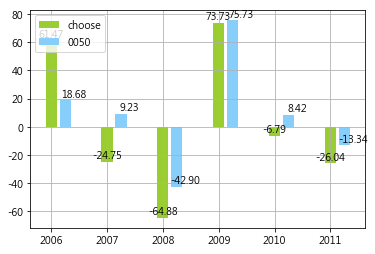

In [17]:
index = [2006,2007,2008,2009,2010,2011]
index = np.asarray(index)
plt.bar(index,remuneration0,.2,facecolor = 'yellowgreen', label='choose')
plt.bar(index+0.25,remuneration1,.2,facecolor = 'lightskyblue', label='0050')
for x,y in zip(index,remuneration0):
    plt.text(x, y+0.08, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(index,remuneration1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

# 一年每週價格漲跌幅做Hierarchical

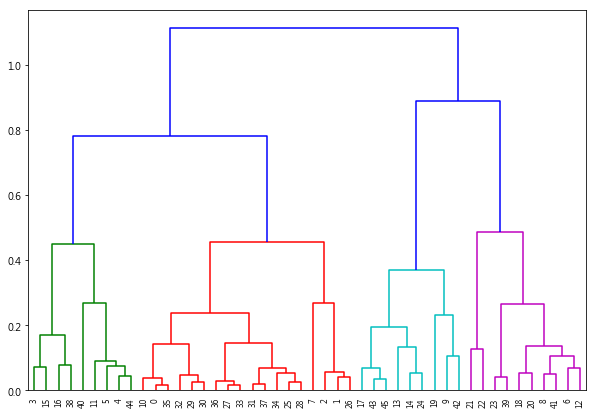

In [99]:
plt.figure(figsize=(10, 7))   
dend = shc.dendrogram(shc.linkage(pos, method='ward'))

In [100]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit(pos)  

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x7f8704289e18>)

# 結果

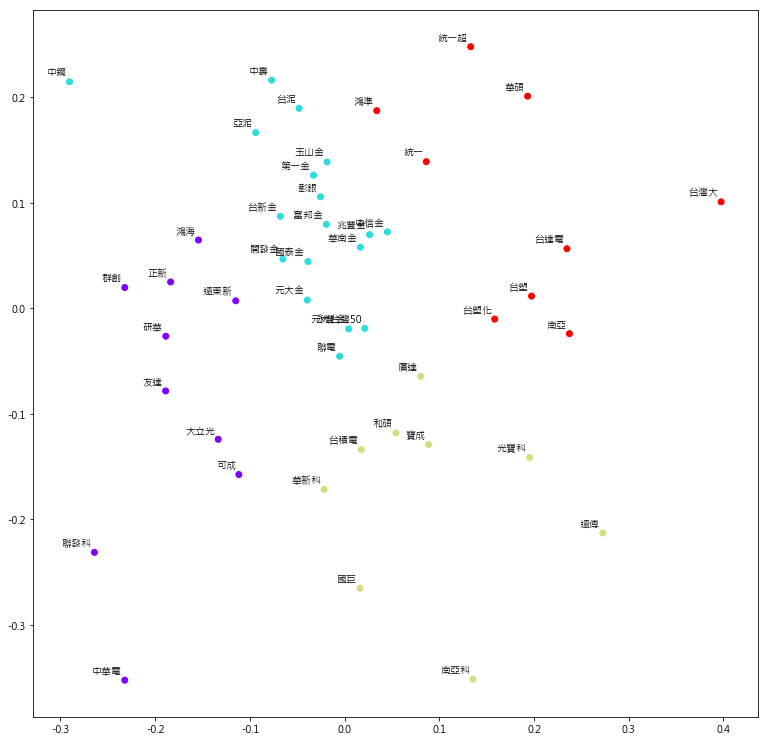

In [101]:
plt.figure(figsize=(13, 13))
plt.scatter(pos[:,0], pos[:,1], c=cluster.labels_, cmap='rainbow')
for label, x, y in zip(names, pos[:, 0], pos[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [148]:
year = '2006'
remuneration0 = []
remuneration1 = []

for i in range(6):
    temp = year+'-01-01'
    data0 = pd.read_sql('select * from price where (id = "2409 友達" or id = "2881 富邦金" or id = "2308 台達電" or id = "9904 寶成") and date > ? ORDER BY date ASC LIMIT 3',con=engine,index_col='id',params=[temp])
    data00 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date > ? ORDER BY date ASC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data00)
    temp = year+'-12-31'
    data1 = pd.read_sql('select * from price where (id = "2409 友達" or id = "2881 富邦金" or id = "2308 台達電" or id = "9904 寶成") and date < ? ORDER BY date DESC LIMIT 3',con=engine,index_col='id',params=[temp])
    data01 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date < ? ORDER BY date DESC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data01)
    temp = (data1['price_adjustment'] - data0['price_adjustment'])/data0['price_adjustment']
    remuneration0.append(temp.describe()['mean']*100)
    temp = (data01['price_adjustment'] - data00['price_adjustment'])/data00['price_adjustment']
    remuneration1.append(temp.values[0]*100)
    year = str(int(year)+1)

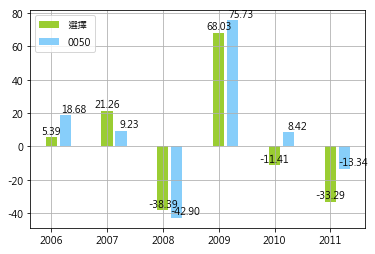

In [149]:
index = [2006,2007,2008,2009,2010,2011]
index = np.asarray(index)
plt.bar(index,remuneration0,.2,facecolor = 'yellowgreen', label='選擇')
plt.bar(index+0.25,remuneration1,.2,facecolor = 'lightskyblue', label='0050')
for x,y in zip(index,remuneration0):
    plt.text(x, y+0.08, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(index,remuneration1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

# 價量關係做k-means

In [102]:
data = pd.read_csv('50價量.csv',index_col='證券代碼')
data = data.drop('收盤價(元)_週',axis=1)
data = data.drop(index=['2327 國巨','2492 華新科'])

In [103]:
data = data[data['年月日'] < '2016-12-31']

In [104]:
data =  data[data['年月日'] > '2016-01-01']

In [105]:
data = data.drop('年月日',axis=1)

In [106]:
num_price = []
for i in data.index[:47]:
    temp = data.loc[i].values
    temp = temp.reshape(102)
    num_price.append(temp)

In [107]:
kmeans = KMeans(n_clusters=4, random_state=0, n_jobs=4, max_iter=1000, n_init=3).fit(num_price)

In [108]:
na_pr = pd.DataFrame(data=list(data.index[:47]),columns=['name'])

In [109]:
temp = {}
for i in range(47):
    temp[i] = kmeans.labels_[i]

In [110]:
na_pr['label'] = na_pr.index.map(temp)

# 結果

In [38]:
na_pr.sort_values('label')

,name,label
0,1101 台泥,0
20,2412 中華電,0
21,2454 聯發科,0
22,2474 可成,0
45,9904 寶成,0
24,2823 中壽,0
25,2880 華南金,0
18,2408 南亞科,0
36,2912 統一超,0
38,3045 台灣大,0
